# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:
import sklearn.datasets


C:\Users\gonza\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


# Challenge 1 - Explore the Scikit-Learn Datasets

Before starting to work on our own datasets, let's first explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)).

In [10]:
# Your code here:
diabetes = sklearn.datasets.load_diabetes()

Let's explore this variable by looking at the different attributes (keys) of `diabetes`. Note that the `load_diabetes` function does not return dataframes. It returns you a Python dictionary.

In [11]:
# Your code here:
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names'])

#### The next step is to read the description of the dataset. 

Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable. Read the data description carefully to fully understand what each column represents.

*Hint: If your output is ill-formatted by displaying linebreaks as `\n`, it means you are not using the `print` function.*

In [13]:
# Your code here:
print(diabetes.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

#### Based on the data description, answer the following questions:

1. How many attributes are there in the data? What do they mean?

1. What is the relation between `diabetes['data']` and `diabetes['target']`?

1. How many records are there in the data?

In [15]:
# Enter your answer here:
#1.- 10 attributes. 

#2.- Diabetes "data" is the features, characteristics of patients and diabetes "target" is the variable we want to predict. 

#3.-There is a total of 442 records 

#### Now explore what are contained in the *data* portion as well as the *target* portion of `diabetes`. 

Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). Inspect the shape of `data` and `target`. Confirm they are consistent with the data description.

In [22]:
print(f"Number of cases: {len(diabetes.target)}, Number of attributes: {len(diabetes.data[0])}")

Number of cases: 442, Number of attributes: 10


# Challenge 2 - Perform Supervised Learning on the Dataset

The data have already been split to predictor (*data*) and response (*target*) variables. Given this information, we'll apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset.

#### Let's briefly revisit the linear regression formula:

```
y = β0 + β1X1 + β2X2 + ... + βnXn + ϵ
```

...where:

- X1-Xn: data 
- β0: intercept 
- β1-βn: coefficients 
- ϵ: error (cannot explained by model)
- y: target

Also take a look at the `sklearn.linear_model.LinearRegression` [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

#### In the cell below, import the `linear_model` class from `sklearn`. 

In [24]:
from sklearn.linear_model import LinearRegression

#### Create a new instance of the linear regression model and assign the new instance to the variable `diabetes_model`.

In [25]:
model = LinearRegression()

#### Next, let's split the training and test data.

Define `diabetes_data_train`, `diabetes_target_train`, `diabetes_data_test`, and `diabetes_target_test`. Use the last 20 records for the test data and the rest for the training data.

In [27]:
# Your code here:
cut = 20
diabetes_data_train = diabetes.data[:-cut]
diabetes_target_train = diabetes.target[:-cut]
diabetes_data_test = diabetes.data[-cut:]
diabetes_target_test = diabetes.target[-20:]

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Fit the training data and target to `diabetes_model`. Print the *intercept* and *coefficients* of the model.

In [32]:
# Your code here:
model.fit(diabetes_data_train,diabetes_target_train)
print(f"Intercept: {model.intercept_},\n\nCoefficientes:{model.coef_}")

Intercept: 152.76430691633442,

Coefficientes:[ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]


#### Inspecting the results

From the outputs you should have seen:

- The intercept is a float number.
- The coefficients are an array containing 10 float numbers.

This is the linear regression model fitted to your training dataset.

#### Using your fitted linear regression model, predict the *y* of `diabetes_data_test`.

In [42]:
# Your code here:
results = model.predict(diabetes_data_test)
print(len(results), len(diabetes_data_test))
print((results))

20 20
[197.61846908 155.43979328 172.88665147 111.53537279 164.80054784
 131.06954875 259.12237761 100.47935157 117.0601052  124.30503555
 218.36632793  61.19831284 132.25046751 120.3332925   52.54458691
 194.03798088 102.57139702 123.56604987 211.0346317   52.60335674]


#### Print your `diabetes_target_test` and compare with the prediction. 

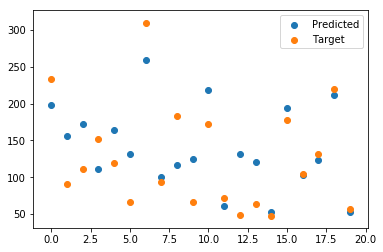

In [48]:
# Your code here:
import matplotlib.pyplot as plt
plt.scatter(x = list(range(20)),y = results)
plt.scatter(x = list(range(20)),y = diabetes_target_test)
plt.legend(["Predicted", "Target"])

#### Is `diabetes_target_test` exactly the same as the model prediction? Explain.

In [49]:
# Your explanation here:
# No. It is a model that tries to fit the train data linearly, therefor it is highly improbable that it will return same values for test data. 

# Bonus Challenge 1 - Hypothesis Testing with `statsmodels`

After generating the linear regression model from the dataset, you probably wonder: then what? What is the statistical way to know if my model is reliable or not?

Good question. We'll discuss that using Scikit-Learn in Challenge 5. But for now, let's use a fool-proof way by using the ([Linear Regression class of StatsModels](https://www.statsmodels.org/dev/regression.html)) which can also conduct linear regression analysis plus much more such as calcuating the F-score of the linear model as well as the standard errors and t-scores for each coefficient. The F-score and t-scores will tell you whether you can trust your linear model.

To understand the statistical meaning of conducting hypothesis testing (e.g. F-test, t-test) for slopes, read [this webpage](https://onlinecourses.science.psu.edu/stat501/node/297/) at your leisure time. We'll give you a brief overview next.

* The F-test of your linear model is to verify whether at least one of your coefficients is significantly different from zero. Translating that into the *null hypothesis* and *alternative hypothesis*, that is:

    ```
    H0 : β1 = β2 = ... = β10 = 0
    HA : At least one βj ≠ 0 (for j = 1, 2, ..., 10)
    ```

* The t-tests on each coefficient is to check whether the confidence interval for the variable contains zero. If the confidence interval contains zero, it means the null hypothesis for that variable is not rejected. In other words, this particular vaiable is not contributing to your linear model and you can remove it from your formula.

Read the documentations of [StatsModels Linear Regression](https://www.statsmodels.org/dev/regression.html) as well as its [`OLS` class](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html) which stands for *ordinary least squares*.

#### In the next cell, analyze `diabetes_data_train` and `diabetes_target_train` with the linear regression model of `statsmodels`. Print the fit summary.

Your output should look like:

![statsmodels regression](../statsmodels.png)

In [62]:
# Your code here:
import numpy as np
import statsmodels.api as sm
import statsmodels.regression.linear_model

X = sm.add_constant(diabetes_data_train)
y = diabetes_target_train
model = sm.OLS(y, X)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     43.16
Date:                Tue, 01 Oct 2019   Prob (F-statistic):           4.64e-58
Time:                        15:47:21   Log-Likelihood:                -2281.1
No. Observations:                 422   AIC:                             4584.
Df Residuals:                     411   BIC:                             4629.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.7643      2.658     57.469      0.000     147.539     157.990
x1             0.3035     61.286      0.005      0.996    -120.169     120.776
x2          -237.6393     62.837     -3.782      0.000    -361.162    -114.117
x3           510.5306     68.156      7.491      0.000     376.553     644.508
x4           327.7370     66.876      4.901      0.000     196.275     459.199
x5          -814.1317    424.044     -1.920      0.056   -1647.697      19.434
x6           492.8146    344.227      1.432      0.153    -183.850    1169.480
x7           102.8485    219.463      0.469      0.640    -328.561     534.258
x8           184.6065    167.336      1.103      0.271    -144.334     513.547
x9           743.5196    175.359      4.240      0.000     398.807    1088.232
x10           76.0952     68.293      1.114      0.266     -58.152     210.343
==============================================================================
Omnibus:                        1.544   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.462   Jarque-Bera (JB):                1.421
Skew:                           0.004   Prob(JB):                        0.491
Kurtosis:                       2.716   Cond. No.                         224.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Interpreting hypothesis testing results

Answer the following questions in the cell below:

1. What is the F-score of your linear model and is the null hypothesis rejected?

1. Does any of the t-tests of the coefficients produce a confidence interval containing zero? What are they?

1. How will you modify your linear reguression model according to the test results above?

In [ ]:
# Your answers here:
#1.- The null hypothesis is rejected as the F-statistic is way bugger than 0.05. 

#2.- There is one test that suggests that a feature contains 0: feature 2: sex.

#3.- Sex can be deleted from the features. 

In [83]:
import pandas as pd 
df = pd.DataFrame(diabetes_data_train).drop(columns=1)
diabetes_data_train_noSex = np.array(df)

9

In [84]:
X = sm.add_constant(diabetes_data_train_noSex)
y = diabetes_target_train
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     44.92
Date:                Tue, 01 Oct 2019   Prob (F-statistic):           6.64e-56
Time:                        16:01:50   Log-Likelihood:                -2288.3
No. Observations:                 422   AIC:                             4597.
Df Residuals:                     412   BIC:                             4637.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.8320      2.701     56.589      0.000     147.523     158.141
x1           -23.1479     61.948     -0.374      0.709    -144.921      98.625
x2           548.5117     68.491      8.008      0.000     413.876     683.148
x3           282.1214     66.833      4.221      0.000     150.745     413.498
x4          -741.2911    430.390     -1.722      0.086   -1587.326     104.744
x5           441.6982    349.470      1.264      0.207    -245.269    1128.665
x6           143.8575    222.705      0.646      0.519    -293.923     581.638
x7           133.3178    169.456      0.787      0.432    -199.789     466.425
x8           750.6481    178.157      4.213      0.000     400.437    1100.859
x9            59.4792     69.243      0.859      0.391     -76.635     195.593
==============================================================================
Omnibus:                        5.508   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                3.858
Skew:                           0.078   Prob(JB):                        0.145
Kurtosis:                       2.558   Cond. No.                         224.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Challenge 3 - Peform Supervised Learning on a Pandas Dataframe

Now that we have dealt with data that has been formatted for scikit-learn, let's look at data that we will need to format ourselves.

In the next cell, load the `auto-mpg.csv` file included in this folder and assign it to a variable called `auto`.

In [120]:
# Your code here:
auto = pd.read_csv("../auto-mpg.csv")

Look at the first 5 rows using the `head()` function:

In [158]:
# Your code here:
print(auto.shape)
auto.head()

(392, 7)


,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


Evaluate the data to ensure that all numeric columns are correctly detected as such by pandas. If a column is misclassified as object, coerce it to numeric.

In [122]:
# Your code here:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horse_power     float64
weight            int64
acceleration    float64
model_year        int64
car_name         object
dtype: object

What is the newest model year and the oldest model year?

In [123]:
# Your code here:
print(f"Newest model year: {max(auto.model_year)},\n\nOldest model year: {min(auto.model_year)}")

Newest model year: 82,

Oldest model year: 70


Check the dataset for missing values and remove all rows containing at least one missing value.

In [124]:
# Your code here:
print(auto.isna().sum())
auto = auto.dropna()
a.isna().sum()

mpg             0
cylinders       0
displacement    0
horse_power     6
weight          0
acceleration    0
model_year      0
car_name        0
dtype: int64


mpg             0
cylinders       0
displacement    0
horse_power     0
weight          0
acceleration    0
model_year      0
car_name        0
dtype: int64

Find the frequency table for the `cylinders` column using the `value_counts()` function. How many possible values of cylinders are there?

In [125]:
# Your code here:
auto.cylinders.value_counts()
print(f"There are {len(auto.cylinders.value_counts())} possible values: {list(auto.cylinders.value_counts().index)}")


There are 5 possible values: [4, 8, 6, 3, 5]


We would like to generate a linear regression model that will predict mpg. To do this, first drop the `car_name` column since it does not contain any quantitative data. Next separate the dataframe to predictor and response variables. Separate those into test and training data with 80% of the data in the training set and the remainder in the test set. 

Assign the predictor and response training data to `X_train` and `y_train` respectively. Similarly, assign the predictor and response test data to `X_test` and `y_test`.

*Hint: To separate data for training and test, use the `train_test_split` method we used in previous labs.*

In [127]:
if "car_name" in auto:
    auto = auto.drop(columns=["car_name"])
    print("Column deleted")
else: 
    print("Column already deleted")

Column already deleted


In [129]:
auto.head()


,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [221]:
from sklearn.model_selection import train_test_split
# Your code here:

X = auto.drop(columns="mpg")
#X = np.array(X)
y = auto["mpg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Now we will processed and peform linear regression on this data to predict the mpg for each vehicle. 

#### In the next cell, create an instance of the linear regression model and call it `auto_model`. Fit `auto_model` with your training data.

In [195]:
# Your code here:

#Scikit Learn
auto_model = LinearRegression()
auto_model.fit(X_train, y_train)

#StatsModel
X_train = sm.add_constant(X_train)
auto_model = sm.OLS(y_train,X_train)
results_auto = auto_model.fit()
results_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     242.3
Date:                Tue, 01 Oct 2019   Prob (F-statistic):          1.96e-120
Time:                        17:34:52   Log-Likelihood:                -932.60
No. Observations:                 352   AIC:                             1879.
Df Residuals:                     345   BIC:                             1906.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -15.5314      5.105     -3.042      0.003     -25.573      -5.490
cylinders       -0.2930      0.353     -0.831      0.407      -0.987       0.401
displacement     0.0037      0.008      0.473      0.637      -0.012       0.019
horse_power      0.0059      0.015      0.402      0.688      -0.023       0.035
weight          -0.0066      0.001     -9.313      0.000      -0.008      -0.005
acceleration     0.1001      0.108      0.930      0.353      -0.112       0.312
model_year       0.7540      0.056     13.489      0.000       0.644       0.864
==============================================================================
Omnibus:                       42.656   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.323
Skew:                           0.732   Prob(JB):                     3.25e-16
Kurtosis:                       4.648   Cond. No.                     8.64e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Challenge 4 - Evaluate the Model

In addition to evaluating your model with F-test and t-test, you can also use the *Coefficient of Determination* (a.k.a. *r squared score*). This method does not simply tell *yes* or *no* about the model fit but instead indicates how much variation can be explained by the model. Based on the r squared score, you can decide whether to improve your model in order to obtain a better fit.

You can learn about the r squared score [here](). Its formula is:

![R Squared](../r-squared.png)

...where:

* yi is an actual data point.
* ŷi is the corresponding data point on the estimated regression line.

By adding the squares of the difference between all yi-ŷi pairs, we have a measure called SSE (*error sum of squares*) which is an application of the r squared score to indicate the extent to which the estimated regression model is different from the actual data. And we attribute that difference to the random error that is unavoidable in the real world. Obviously, we want the SSE value to be as small as possible.

#### In the next cell, compute the predicted *y* based on `X_train` and call it `y_pred`. Then calcualte the r squared score between `y_pred` and `y_train` which indicates how well the estimated regression model fits the training data.

*Hint: r squared score can be calculated using `sklearn.metrics.r2_score` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)).*

In [177]:
from sklearn.metrics import r2_score

R^2 Value is : 0.8081864233489973


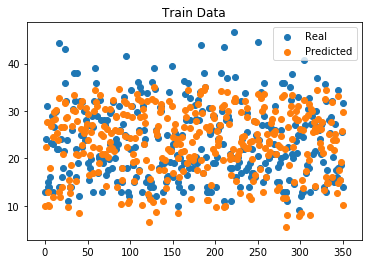

In [196]:
y_pred = results_auto.predict(exog = X_train)
r2Score = r2_score(y_train, y_pred)
print(f"R^2 Value is : {r2Score}")
plt.scatter(x = list(range(len(y_train))),y =  y_train)
plt.scatter(x = list(range(len(y_train))),y =  y_pred)
plt.legend(["Real", "Predicted"])
a = plt.title("Train Data")

#### Our next step is to evaluate the model using the test data. 

We would like to ensure that our model is not overfitting the data. This means that our model was made to fit too closely to the training data by being overly complex. If a model is overfitted, it is not generalizable to data outside the training data. In that case, we need to reduce the complexity of the model by removing certain features (variables).

In the cell below, use the model to generate the predicted values for the test data and assign them to `y_test_pred`. Compute the r squared score of the predicted `y_test_pred` and the oberserved `y_test` data.

R^2 Value is : 0.8119182735876134


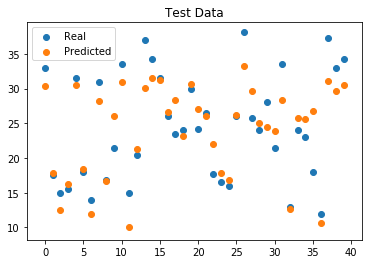

In [197]:
# Your code here:
X_test = sm.add_constant(X_test)
y_test_pred = results_auto.predict(exog = X_test)
r2Score = r2_score(y_test, y_test_pred)
print(f"R^2 Value is : {r2Score}")
plt.scatter(x = list(range(len(y_test))),y =  y_test)
plt.scatter(x = list(range(len(y_test))),y =  y_test_pred)
plt.legend(["Real", "Predicted"])
a = plt.title("Test Data")

#### Explaining the results

The r squared scores of the training data and the test data are pretty close (0.8146 vs 0.7818). This means our model is not overfitted. However, there is still room to improve the model fit. Move on to the next challenge.

# Challenge 5 - Improve the Model Fit

While the most common way to improve the fit of a model is by using [regularization](https://datanice.github.io/machine-learning-101-what-is-regularization-interactive.html), there are other simpler ways to improve model fit. The first is to create a simpler model. The second is to increase the train sample size.

Let us start with the easier option and increase our train sample size to 90% of the data. Create a new test train split and name the new predictors and response variables `X_train09`, `X_test09`, `y_train09`, `y_test09`.

In [180]:
# Your code here:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

Initialize a new linear regression model. Name this model `auto_model09`. Fit the model to the new sample (training) data.

In [181]:
# Your code here:
X_train = sm.add_constant(X_train)
auto_model09 = sm.OLS(y_train,X_train)
results_auto09 = auto_model09.fit()
results_auto09.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     242.3
Date:                Tue, 01 Oct 2019   Prob (F-statistic):          1.96e-120
Time:                        16:48:26   Log-Likelihood:                -932.60
No. Observations:                 352   AIC:                             1879.
Df Residuals:                     345   BIC:                             1906.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -15.5314      5.105     -3.042      0.003     -25.573      -5.490
cylinders       -0.2930      0.353     -0.831      0.407      -0.987       0.401
displacement     0.0037      0.008      0.473      0.637      -0.012       0.019
horse_power      0.0059      0.015      0.402      0.688      -0.023       0.035
weight          -0.0066      0.001     -9.313      0.000      -0.008      -0.005
acceleration     0.1001      0.108      0.930      0.353      -0.112       0.312
model_year       0.7540      0.056     13.489      0.000       0.644       0.864
==============================================================================
Omnibus:                       42.656   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.323
Skew:                           0.732   Prob(JB):                     3.25e-16
Kurtosis:                       4.648   Cond. No.                     8.64e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Compute the predicted values and r squared score for our new model and new sample data.

R^2 Value is : 0.8081864233489973


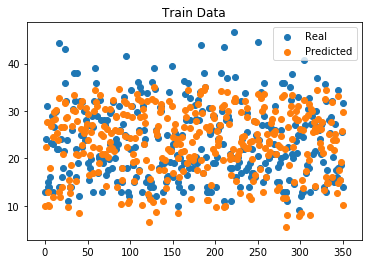

In [183]:
# Your code here:
y_pred = results_auto09.predict(exog = X_train)
r2Score = r2_score(y_train, y_pred)
print(f"R^2 Value is : {r2Score}")
plt.scatter(x = list(range(len(y_train))),y =  y_train)
plt.scatter(x = list(range(len(y_train))),y =  y_pred)
plt.legend(["Real", "Predicted"])
a = plt.title("Train Data")

Compute the r squared score for the smaller test set. Is there an improvement in the test r squared?

R^2 Value is : 0.8119182735876134


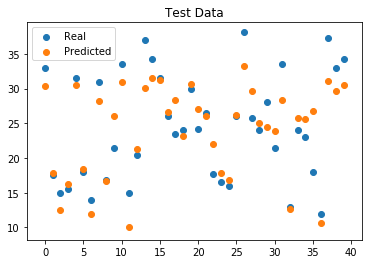

In [187]:
# Your code here:
# Your code here:
X_test = sm.add_constant(X_test)
y_test_pred = results_auto09.predict(exog = X_test)
r2Score = r2_score(y_test, y_test_pred)
print(f"R^2 Value is : {r2Score}")
plt.scatter(x = list(range(len(y_test))),y =  y_test)
plt.scatter(x = list(range(len(y_test))),y =  y_test_pred)
plt.legend(["Real", "Predicted"])
a = plt.title("Test Data")


#No there is not actually


# Bonus Challenge 2 - Backward Elimination 

The main way to produce a simpler linear regression model is to reduce the number of variables used in the model. In scikit-learn, we can do this by using recursive feature elimination. You can read more about RFE [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html).

In the next cell, we will import RFE

In [188]:
from sklearn.feature_selection import RFE

Follow the documentation and initialize an RFE model using the `auto_model` linear regression model. Set `n_features_to_select=3`

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train,y_train)
selector = RFE(model,n_features_to_select=3)

Fit the model and print the ranking

In [216]:
# Your code here:
selector = selector.fit(X_train, y_train)
print(f"Ranking: {selector.ranking_}")

Ranking: [1 2 4 3 1 1]


Feature importance is ranked from most important (1) to least important (4). Generate a model with the three most important features. The features correspond to variable names. For example, feature 1 is `cylinders` and feature 2 is `displacement`.

Perform a test-train split on this reduced column data and call the split data `X_train_reduced`, `X_test_reduced`, `y_test_reduced`, `y_train_reduced`. Use an 80% split.

Generate a new model called `auto_model_reduced` and fit this model. Then proceed to compute the r squared score for the model. Did this cause an improvement in the r squared score?

In [229]:
# Your code here:
X1 = pd.DataFrame(X).drop(columns = ["displacement", "horse_power", "weight"])
y1 = pd.DataFrame(y)
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X1,y1,test_size = 0.2)
model = LinearRegression()
model.fit(X_train_reduced,y_train_reduced)
y_pred_reduced = model.predict(X_test_reduced)
r_square = r2_score(y_test_reduced, y_pred_reduced)
print(f"R^2:{r_square}")

R^2:0.7387026466450586


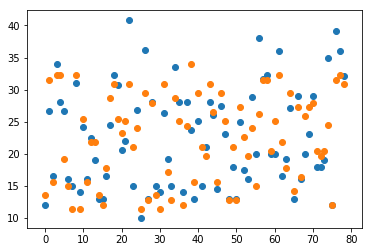

In [230]:
plt.scatter(list(range(len(y_test_reduced))), y_test_reduced)
plt.scatter(list(range(len(y_test_reduced))), y_pred_reduced)

#### Conclusion

You may obtain the impression from this lab that without knowing statistical methods in depth, it is difficult to make major progress in machine learning. That is correct. If you are motivated to become a data scientist, statistics is the subject you must be proficient in and there is no shortcut. 

Completing these labs is not likely to make you a data scientist. But you will have a good sense about what are there in machine learning and what are good for you. In your future career, you can choose one of the three tracks:

* Data scientists who need to be proficient in statistical methods.

* Data engineers who need to be good at programming.

* Data integration specialists who are business or content experts but also understand data and programming. This cross-disciplinary track brings together data, technology, and business and will be in high demands in the next decade.